In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import feature_fnc
import whois
import os
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
import re
from ipaddress import ip_address, IPv4Address, IPv6Address
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import precision_score,recall_score
from sklearn.feature_selection import mutual_info_classif


In [121]:
def hex_to_ip(hex_input):
    """
    Convert a hexadecimal input to an IP address string.
    Args:
        hex_input (str): The hexadecimal input to convert.
    Returns:
        str: The corresponding IP address string.
    Example:
        >>> hex_to_ip("C0A80001")
        '192.168.0.1'
    """

    # Convert the hexadecimal input to a decimal integer
    #decimal_input = int(hex_input, 16)
    #decimal_input = int(hex_input, 8)
    #print(int(hex_input, 16))
    decimal_input = int(hex_input)
    print(decimal_input)
    #print(decimal_input >> 24)
    # Convert the decimal input to an IP address string
    ip_address = ".".join(
        map(str, [decimal_input >> 24, (decimal_input >> 16) & 255, (decimal_input >> 8) & 255, decimal_input & 255])
    )

    # Return the IP address string
    return ip_address


In [122]:
hex_to_ip("3232235521")

3232235521


'192.168.0.1'

In [86]:
def patrik(hostname):
    try:
        print(type(hostname))
        if type(ip_address(hostname)) is IPv4Address or IPv6Address:
            return 1
    except:
        return 0

In [106]:
patrik("3232235521")

<class 'str'>


0

In [133]:
def is_ip(input):
        try:
            decimal_input = int(input, 16)
            test = ".".join(map(str, [decimal_input >> 24, (decimal_input >> 16) & 255, (decimal_input >> 8) & 255, decimal_input & 255]))
            #print(ip_address)
            if type(ip_address(test)) is IPv4Address or IPv6Address:
                return 1
        except:
            try:
                decimal_input = int(input, 8)
                test = ".".join(map(str, [decimal_input >> 24, (decimal_input >> 16) & 255, (decimal_input >> 8) & 255, decimal_input & 255]))
                #print(ip_address)
                if type(ip_address(test)) is IPv4Address or IPv6Address:
                    return 1
            except:
                try:
                    decimal_input = int(input)
                    test = ".".join(map(str, [decimal_input >> 24, (decimal_input >> 16) & 255, (decimal_input >> 8) & 255, decimal_input & 255]))
                    #print(ip_address)
                    if type(ip_address(test)) is IPv4Address or IPv6Address:
                        return 1
                except:
                    try:
                        if type(ip_address(input)) is IPv4Address or IPv6Address:
                            return 1
                    except:
                        return 0




In [103]:
def def_test(input):
    decimal_input = input
    test = ".".join(map(str, [decimal_input >> 24, (decimal_input >> 16) & 255, (decimal_input >> 8) & 255, decimal_input & 255]))
    #print(ip_address)
    try:
        if type(ip_address(test)) is IPv4Address or IPv6Address:
            return 1
    except:
            return 0

In [129]:
def_test("3232235521")

TypeError: unsupported operand type(s) for >>: 'str' and 'int'

In [136]:
hex_to_ip("192.168.0.1")

1

In [7]:
url_df

,url,status,protocol,subdomain,domain,tld,hostname,path,params,query,fragment,filename
0,http://www.crestonwood.com/router.php,legitimate,http,www,crestonwood,com,www.crestonwood.com,/router.php,,,,router.php
1,http://shadetreetechnology.com/V4/validation/a...,phishing,http,,shadetreetechnology,com,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,,a111aedc8ae390eabcfa130e041a10a4
2,https://support-appleld.com.secureupdate.duila...,phishing,https,support-appleld.com.secureupdate,duilawyeryork,com,support-appleld.com.secureupdate.duilawyeryork...,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,,
3,http://rgipt.ac.in,legitimate,http,,rgipt,ac.in,rgipt.ac.in,,,,,
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,http,www,iracing,com,www.iracing.com,/tracks/gateway-motorsports-park/,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate,http,www,fontspace,com,www.fontspace.com,/category/blackletter,,,,blackletter
11426,http://www.budgetbots.com/server.php/Server%20...,phishing,http,www,budgetbots,com,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,,index.php
11427,https://www.facebook.com/Interactive-Televisio...,legitimate,https,www,facebook,com,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230...,,ref=page_internal,,
11428,http://www.mypublicdomainpictures.com/,legitimate,http,www,mypublicdomainpictures,com,www.mypublicdomainpictures.com,/,,,,


In [3]:
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_rows', None)

In [26]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')

In [9]:
url_df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [27]:
filt=(url_df['ip'] > 0)

In [28]:
filt

0        False
1         True
2         True
3        False
4        False
         ...  
11425    False
11426    False
11427     True
11428    False
11429     True
Name: ip, Length: 11430, dtype: bool

In [12]:
url_df[filt].head(20)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
1,http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
7,http://www.shadetreetechnology.com/V4/validation/ba4b8bddd7958ecb8772c836c2969531,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
24,http://support-appleld.com.secureupdate.duilawyeryork.com/ap/bb14d7ff1fcbf29?cmd=_update&dispatch=bb14d7ff1fcbf29bb&locale=_us,126,50,1,4,1,0,1,2,0,...,1,1,0,25,3993,5707171,0,1,0,phishing
28,http://secureupdate.appleld.com.duilawyeryork.com/ap/88b142e778d73f7,68,42,1,4,0,0,0,0,0,...,1,1,0,25,3993,5707171,0,1,0,phishing
29,http://www.inbioma.pe/rechnung-376440790464490488&amp;cgi3-viewkontakt-376440790464490488-007acctpagetype-376440790464490488=4674720-&amp;info@s-und-s-shop.de.html,163,14,1,4,9,1,0,2,0,...,1,1,0,0,-1,0,0,1,0,phishing
31,http://mno.naomigoff.com/Apollo/bc28a52c2070ca93176244f59e1f19c6,64,17,1,2,0,0,0,0,0,...,1,1,0,224,1237,0,0,1,1,phishing
32,http://xh167894743.el.r.appspot.com/,36,28,1,4,0,0,0,0,0,...,1,1,0,217,5627,0,0,1,5,phishing
34,https://answers.yahoo.com/question/index?qid=20060914152716AAZTOSo,66,17,1,2,0,0,1,0,0,...,0,0,0,911,9316,13,0,0,7,legitimate
42,http://www.courgeon-immobilier.fr/wp-content/uploads/2019/07/tpg/9ac6ba30463d0fb7974c06843717284c/,98,26,1,2,2,0,0,0,0,...,1,1,0,257,2300,0,0,1,2,phishing


In [6]:
cleaned_df

,status,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,0,37,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,17,77,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,19,126,4,2,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,0,18,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,0,55,2,0,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,0,45,2,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,2,84,5,0,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,15,105,2,1,6,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [12]:
## Create Dataset ##
url_df= pd.read_csv('Data/Web page phishing detection/Web page phishing detection/dataset_B_05_2020.csv')
url_df.drop(columns=url_df.columns[1:-1], inplace=True)
feature_fnc.parseurl(url_df)
cleaned_df=feature_fnc.feature_generator(url_df)
cleaned_df.set_index('url',inplace=True)

In [6]:
cleaned_df.columns

Index(['status', 'https_true', 'url_digits_count', 'url_lenght',
       'url_dot_count', 'url_underline_count', 'url_hyphen_count',
       'url_slash_count', 'url_questionmark_count', 'url_equal_count',
       'url_at_count', 'url_and_count', 'url_exclamation_count',
       'url_space_count', 'url_space_encoded_count', 'url_comma_count',
       'url_tilde_count', 'url_plus_count', 'url_asterisk_count',
       'url_hashtag_count', 'url_dollar_count', 'url_percent_count',
       'url_www_count', 'url_doubleslash_count', 'url_http_count',
       'url_https_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_underline_count', 'hostname_hyphen_count',
       'hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_

In [4]:
filt=(cleaned_df['hostname_isip'] > 0)

In [5]:
cleaned_df[filt]

,status,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://98.126.214.77/ap/signin?openid.pape.max_auth_age=0&amp;openid.return_to=https://www.amazon.co.jp/?ref_=nav_em_hd_re_signin&amp;openid.identity=http://specs.openid.net/auth/2.0/identifier_select&amp;openid.assoc_handle=jpflex&amp;openid.mode=checkid_setup&amp;key=a@b.c&amp;openid.claimed_id=http://specs.openid.net/auth/2.0/identifier_select&amp;openid.ns=http://specs.openid.net/auth/2.0&amp;&amp;ref_=nav_em_hd_clc_signin,phishing,0,17,430,24,18,0,21,2,10,...,0,0,0,0,0,0,0,0,0,0
http://202.77.121.186/kliping/,phishing,0,11,30,3,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
http://201.163.98.162/crm/jssource/src_files/modules/Project/home/de102cc29dbc05509b7f97227/r1.php,phishing,0,28,98,4,1,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0
http://78.143.96.35/wordpress/gam/index.php?bidderblocklogin=,phishing,0,9,61,4,0,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
http://67.199.68.195/intservices.htm,phishing,0,10,36,4,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://185.17.106.194/wp-includes/dropbox/dropbox/,phishing,0,11,50,3,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
http://216.222.194.94/images/social/sign-in/,phishing,0,11,44,3,0,1,6,0,0,...,0,0,0,0,0,0,0,0,0,0
http://209.140.29.226/~paranorm/sites/all/modules/weblinks/translations/ACCOUNTID2B1D11E519226373AC2723EA2BED2F6F/1f0bd7bbbbe3406c3fa5111355e6dfdd/Up-dating.php,phishing,0,47,160,4,0,1,11,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
cleaned_df

,status,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,0,37,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,17,77,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,19,126,4,2,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,0,18,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,0,55,2,0,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,0,45,2,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,2,84,5,0,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,15,105,2,1,6,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
url_df

,url,status,protocol,subdomain,domain,tld,hostname,path,params,query,fragment,filename
0,http://www.crestonwood.com/router.php,legitimate,http,www,crestonwood,com,www.crestonwood.com,/router.php,,,,router.php
1,http://shadetreetechnology.com/V4/validation/a...,phishing,http,,shadetreetechnology,com,shadetreetechnology.com,/V4/validation/a111aedc8ae390eabcfa130e041a10a4,,,,a111aedc8ae390eabcfa130e041a10a4
2,https://support-appleld.com.secureupdate.duila...,phishing,https,support-appleld.com.secureupdate,duilawyeryork,com,support-appleld.com.secureupdate.duilawyeryork...,/ap/89e6a3b4b063b8d/,,cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,,
3,http://rgipt.ac.in,legitimate,http,,rgipt,ac.in,rgipt.ac.in,,,,,
4,http://www.iracing.com/tracks/gateway-motorspo...,legitimate,http,www,iracing,com,www.iracing.com,/tracks/gateway-motorsports-park/,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,legitimate,http,www,fontspace,com,www.fontspace.com,/category/blackletter,,,,blackletter
11426,http://www.budgetbots.com/server.php/Server%20...,phishing,http,www,budgetbots,com,www.budgetbots.com,/server.php/Server%20update/index.php,,email=USER@DOMAIN.com,,index.php
11427,https://www.facebook.com/Interactive-Televisio...,legitimate,https,www,facebook,com,www.facebook.com,/Interactive-Television-Pvt-Ltd-Group-M-100230...,,ref=page_internal,,
11428,http://www.mypublicdomainpictures.com/,legitimate,http,www,mypublicdomainpictures,com,www.mypublicdomainpictures.com,/,,,,


In [28]:
feature_fnc.protocolsecure(url_df.loc[2]['protocol'])

1

In [29]:
url_df.iloc[857]

url         https://portaal.webreus.nl:8080
status                           legitimate
protocol                              https
hostname                 portaal.webreus.nl
path                                       
params                                     
query                                      
fragment                                   
filename                                   
Name: 857, dtype: object

In [6]:
cleaned_df.describe()

,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_and_count,file_exclamation_count,file_space_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
count,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,...,11430.000000,11430.000000,11430.0,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.0,11430.000000
mean,0.0,5.452143,61.120035,2.480665,0.322660,0.997550,4.289589,0.141207,0.293176,0.022222,...,0.002975,0.001312,0.0,0.003062,0.000262,0.004024,0.000087,0.0,0.0,0.030359
std,0.0,16.319904,55.292470,1.369685,1.093336,2.087087,1.882251,0.364456,0.998317,0.155500,...,0.061976,0.036204,0.0,0.095801,0.016199,0.075885,0.009354,0.0,0.0,0.743418
min,0.0,0.000000,12.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.000000,33.000000,2.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.000000,47.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.0,5.000000,71.000000,3.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
max,0.0,679.000000,1641.000000,24.000000,18.000000,43.000000,33.000000,3.000000,19.000000,4.000000,...,2.000000,1.000000,0.0,4.000000,1.000000,3.000000,1.000000,0.0,0.0,54.000000


In [7]:
cleaned_df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [6]:
cleaned_df

,status,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,legitimate,0,0,37,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,phishing,0,17,77,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,phishing,1,19,126,4,2,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,legitimate,0,0,18,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,legitimate,0,0,55,2,0,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,legitimate,0,0,45,2,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,phishing,0,2,84,5,0,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,legitimate,1,15,105,2,1,6,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
cleaned_df.columns

Index(['status', 'https_true', 'url_digits_count', 'url_lenght',
       'url_dot_count', 'url_underline_count', 'url_hyphen_count',
       'url_slash_count', 'url_questionmark_count', 'url_equal_count',
       'url_at_count', 'url_and_count', 'url_exclamation_count',
       'url_space_count', 'url_space_encoded_count', 'url_comma_count',
       'url_tilde_count', 'url_plus_count', 'url_asterisk_count',
       'url_hashtag_count', 'url_dollar_count', 'url_percent_count',
       'url_www_count', 'url_doubleslash_count', 'url_http_count',
       'url_https_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_underline_count', 'hostname_hyphen_count',
       'hostname_slash_count', 'hostname_questionmark_count',
       'hostname_equal_count', 'hostname_at_count', 'hostname_and_count',
       'hostname_exclamation_count', 'hostname_space_count',
       'hostname_space_encoded_count', 'hostname_comma_count',
       'hostname_tilde_count', 'hostname_plus_count',
       'hostname_

In [6]:
cleaned_df=cleaned_df.loc[:, ~(cleaned_df == 0).all()]

In [14]:
cleaned_df=cleaned_df.replace({'legitimate': 0, 'phishing': 1})

In [15]:
cleaned_df.rename(columns = {'status':'phishing'}, inplace = True)

In [16]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,0,37,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,17,77,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,19,126,4,2,1,5,1,3,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,0,18,2,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,0,55,2,0,2,5,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,0,45,2,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,2,84,5,0,0,5,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,15,105,2,1,6,5,1,1,...,0,0,0,0,0,0,0,0,0,0


In [27]:
cleaned_df.iloc[857]

phishing                   0
https_true                 1
url_digits_count           4
url_lenght                31
url_dot_count              2
url_hyphen_count           0
url_slash_count            2
url_questionmark_count     0
url_equal_count            0
url_at_count               0
url_and_count              0
url_www_count              0
url_doubleslash_count      1
url_http_count             1
url_https_count            1
hostname_lenght           18
hostname_dot_count         2
hostname_hyphen_count      0
hostname_isip              0
hostname_digits_count      0
file_dot_count             0
file_underline_count       0
file_hyphen_count          0
file_at_count              0
file_and_count             0
file_plus_count            0
Name: https://portaal.webreus.nl:8080, dtype: int64

In [15]:
filt = (cleaned_df['hostname_punycode'] == 1)

In [16]:
cleaned_df.loc[filt]

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_hyphen_count,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
https://xn--scurit-outlook-bkbf.yolasite.com/,1,1,0,45,2,0,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
https://www.xn--mhringen-n4a.de/,0,1,1,32,2,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://verified.xn--twtter-4va.com.co/,1,0,1,38,3,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://xn--ltappen-80a.se/_default.asp,1,0,2,38,2,1,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,1,0,1,41,3,0,3,3,0,0,...,0,0,0,0,0,0,0,0,0,0
http://xn--begrnungswiki-zob.de/includes/amazon/ap/signin/da2fc8c05d775f6427f3d81ad45ff21d/login.php?/ap/signin_encoding=UTF8-URL=https://www.amazon.com,1,0,19,152,4,1,4,12,1,2,...,0,0,0,0,0,0,0,0,0,0
http://xn--wellness-rhn-fjb.de/wp-content/logo/Whatsapp/,1,0,0,56,1,0,5,6,0,0,...,0,0,0,0,0,0,0,0,0,0
https://xn--80aajiaapeyhqdbo9bk.xn--p1acf/,1,1,4,42,1,0,4,3,0,0,...,0,0,0,0,0,0,0,0,0,0
https://xn--tequeon-8za.pe/sf/daaum/login.php?cmd=login_submit&amp;id=788352865189ea93a768f89ce7d4c453788352865189ea93a768f89ce7d4c453&amp;session=788352865189ea93a768f89ce7d4c453788352865189ea93a768f89ce7d4c453,1,1,97,211,2,1,3,5,1,3,...,0,0,0,0,0,0,0,0,0,0


In [10]:
cleaned_df.columns

Index(['phishing', 'https_true', 'url_digits_count', 'url_lenght',
       'url_dot_count', 'url_underline_count', 'url_hyphen_count',
       'url_slash_count', 'url_questionmark_count', 'url_equal_count',
       'url_at_count', 'url_and_count', 'url_exclamation_count',
       'url_space_count', 'url_space_encoded_count', 'url_comma_count',
       'url_tilde_count', 'url_plus_count', 'url_asterisk_count',
       'url_hashtag_count', 'url_dollar_count', 'url_percent_count',
       'url_www_count', 'url_doubleslash_count', 'url_http_count',
       'url_https_count', 'hostname_lenght', 'hostname_dot_count',
       'hostname_underline_count', 'hostname_hyphen_count',
       'hostname_space_encoded_count', 'hostname_isip',
       'hostname_digits_count', 'hostname_punycode', 'file_lenght',
       'file_dot_count', 'file_underline_count', 'file_hyphen_count',
       'file_equal_count', 'file_at_count', 'file_and_count',
       'file_exclamation_count', 'file_comma_count', 'file_tilde_count',


In [ ]:
#corr_matrix=test.corr().round(2)
#corr_matrix

plt.figure(figsize=(50,50))
plot = sns.heatmap(cleaned_df.corr().round(2), annot = True)

In [13]:
matrix=cleaned_df.corr().round(2)

In [24]:
matrix

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,...,file_hyphen_count,file_equal_count,file_at_count,file_and_count,file_exclamation_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_percent_count
phishing,1.00,-0.11,0.24,0.25,0.21,0.04,-0.10,0.24,0.29,0.23,...,-0.20,0.02,0.05,0.05,0.04,0.00,0.01,-0.05,0.01,-0.01
https_true,-0.11,1.00,-0.00,0.00,-0.04,0.03,0.01,-0.08,0.09,0.08,...,0.00,0.02,-0.00,-0.02,0.04,0.01,0.01,-0.02,0.01,0.01
url_digits_count,0.24,-0.00,1.00,0.79,0.27,0.23,0.22,0.25,0.39,0.48,...,-0.00,0.05,0.04,0.13,-0.00,0.02,-0.00,-0.02,0.01,0.05
url_lenght,0.25,0.00,0.79,1.00,0.44,0.43,0.40,0.48,0.52,0.62,...,0.12,0.04,0.03,0.08,-0.01,0.01,-0.00,-0.01,0.02,0.04
url_dot_count,0.21,-0.04,0.27,0.44,1.00,0.33,0.05,0.24,0.35,0.41,...,-0.01,0.01,0.07,0.03,-0.03,0.02,-0.01,-0.02,0.02,0.01
url_underline_count,0.04,0.03,0.23,0.43,0.33,1.00,0.04,0.25,0.31,0.44,...,-0.04,0.01,-0.01,-0.01,0.00,0.00,-0.00,-0.01,0.03,0.00
url_hyphen_count,-0.10,0.01,0.22,0.40,0.05,0.04,1.00,0.20,0.04,0.11,...,0.61,0.04,0.02,0.11,-0.01,0.00,0.00,-0.01,0.01,-0.01
url_slash_count,0.24,-0.08,0.25,0.48,0.24,0.25,0.20,1.00,0.23,0.20,...,-0.00,0.02,-0.03,-0.00,-0.01,-0.00,0.00,-0.03,-0.01,0.00
url_questionmark_count,0.29,0.09,0.39,0.52,0.35,0.31,0.04,0.23,1.00,0.73,...,-0.08,-0.01,-0.02,-0.02,0.01,-0.01,-0.01,-0.02,-0.00,-0.02
url_equal_count,0.23,0.08,0.48,0.62,0.41,0.44,0.11,0.20,0.73,1.00,...,-0.06,0.07,-0.01,0.04,-0.00,0.01,-0.00,-0.00,-0.00,-0.01


In [14]:
mask=matrix.loc['phishing',:]

In [15]:
filt=(mask > 0.04 ) | (mask < -0.04)

In [15]:
filt

phishing                True
https_true              True
url_digits_count        True
url_lenght              True
url_dot_count           True
                       ...  
file_comma_count       False
file_tilde_count       False
file_plus_count         True
file_asterisk_count    False
file_percent_count     False
Name: phishing, Length: 62, dtype: bool

In [16]:
cleaned_df=cleaned_df.loc[:,filt]

In [17]:
cleaned_df

,phishing,https_true,url_digits_count,url_lenght,url_dot_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,hostname_dot_count,hostname_hyphen_count,hostname_isip,hostname_digits_count,file_dot_count,file_underline_count,file_hyphen_count,file_at_count,file_and_count,file_plus_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,0,37,3,0,3,0,0,0,...,2,0,0,0,1,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,1,0,17,77,1,0,5,0,0,0,...,1,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,1,19,126,4,1,5,1,3,0,...,4,1,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,0,18,2,0,2,0,0,0,...,2,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,0,55,2,2,5,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,0,45,2,0,4,0,0,0,...,2,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,1,0,2,84,5,0,5,1,1,1,...,2,0,0,0,1,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,0,1,15,105,2,6,5,1,1,0,...,2,0,0,0,0,0,0,0,0,0


In [17]:
#cleaned_df.set_index('url',inplace=True)
features=cleaned_df.loc[:,'https_true':]
label=cleaned_df.loc[:,'phishing']

In [18]:
features

,https_true,url_digits_count,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
http://www.crestonwood.com/router.php,0,0,37,3,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4,0,17,77,1,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_,1,19,126,4,2,1,5,1,3,0,...,0,0,0,0,0,0,0,0,0,0
http://rgipt.ac.in,0,0,18,2,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.iracing.com/tracks/gateway-motorsports-park/,0,0,55,2,0,2,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://www.fontspace.com/category/blackletter,0,0,45,2,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com,0,2,84,5,0,0,5,1,1,1,...,0,0,0,0,0,0,0,0,0,0
https://www.facebook.com/Interactive-Television-Pvt-Ltd-Group-M-100230523435650/photos/?ref=page_internal,1,15,105,2,1,6,5,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
label.tail()

url
http://www.fontspace.com/category/blackletter                                                                                                                                                                                                                                                                                                                                                                                                                                                    0
http://www.budgetbots.com/server.php/Server%20update/index.php?email=USER@DOMAIN.com                                                                                                                                                                                                                                                                                                                                                                                                             1
https://www.facebook.com/Inter

In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.3,random_state=42)

In [20]:
mutual_info = mutual_info_classif(X_train, y_train)

In [22]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

url_www_count                 0.106010
url_digits_count              0.103833
hostname_dot_count            0.081361
file_lenght                   0.074950
url_dot_count                 0.073057
                                ...   
hostname_underline_count      0.000000
hostname_slash_count          0.000000
hostname_space_count          0.000000
hostname_exclamation_count    0.000000
hostname_tilde_count          0.000000
Length: 85, dtype: float64

<Axes: >

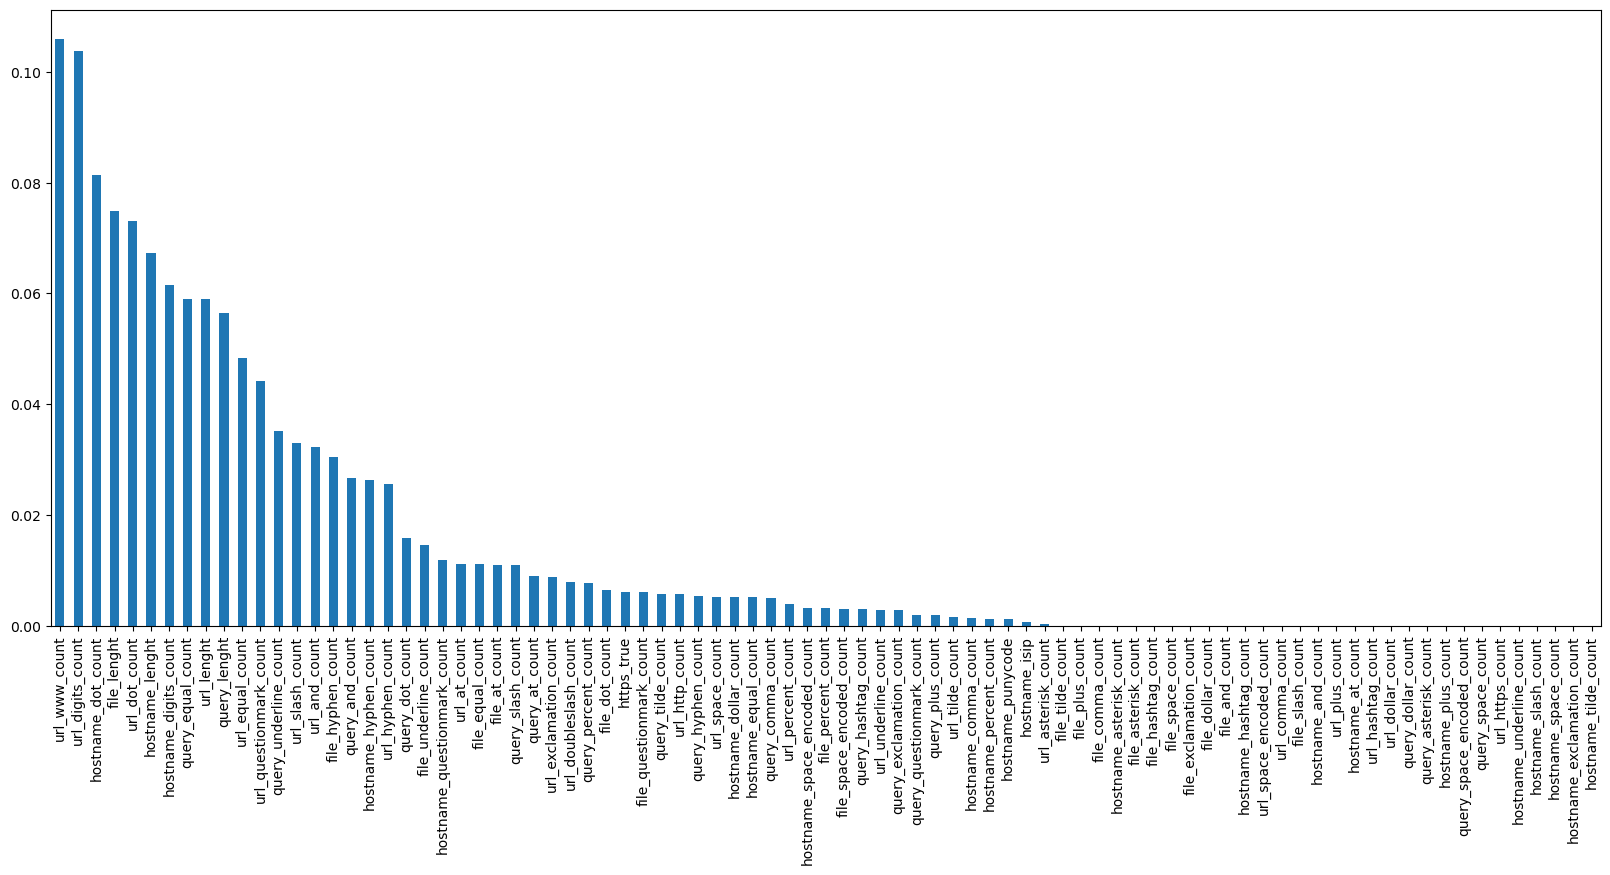

In [23]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [21]:
mutual_info

array([0.00612415, 0.10383313, 0.05894641, 0.07305728, 0.00283997,
       0.02565209, 0.03305329, 0.04416146, 0.04825764, 0.01117029,
       0.03223772, 0.00879464, 0.00523825, 0.        , 0.        ,
       0.00158566, 0.        , 0.00021931, 0.        , 0.        ,
       0.00394344, 0.10601011, 0.00781367, 0.00561375, 0.        ,
       0.06738194, 0.08136117, 0.        , 0.0263744 , 0.        ,
       0.01185573, 0.00510532, 0.        , 0.        , 0.        ,
       0.        , 0.00319548, 0.00139735, 0.        , 0.        ,
       0.        , 0.        , 0.00517202, 0.0012609 , 0.00068744,
       0.06147244, 0.00115788, 0.05649242, 0.01575816, 0.03521508,
       0.00531691, 0.01094946, 0.00196737, 0.05903973, 0.00888654,
       0.02673413, 0.00281641, 0.        , 0.        , 0.00502456,
       0.00562415, 0.00194666, 0.        , 0.0029318 , 0.        ,
       0.00767564, 0.07494953, 0.00647675, 0.01459416, 0.03041798,
       0.        , 0.00601197, 0.01110232, 0.01098019, 0.     

In [13]:
X_train

,url_lenght,url_dot_count,url_underline_count,url_hyphen_count,url_slash_count,url_questionmark_count,url_equal_count,url_at_count,url_and_count,url_exclamation_count,...,file_exclamation_count,file_space_count,file_space_encoded_count,file_comma_count,file_tilde_count,file_plus_count,file_asterisk_count,file_hashtag_count,file_dollar_count,file_percent_count
url,,,,,,,,,,,,,,,,,,,,,
https://4jv02.app.link/HLEkFv2pb2?sdsadasdas,44,2,0,0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.riblanda.com/support.ionos.com/client.accees.account.update/ionos2/index.html,88,8,0,0,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://www.pollsbee.com/wp-content/Doc/9600588046ffb55b872b296c7dcd75c8/verification.php,88,3,0,1,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
https://firebasestorage.googleapis.com/v0/b/authicationapi.appspot.com/o/index.html?alt=media&id=USER@DOMAIN.ch&token=ec98d024-cd36-4129-a6fa-c5ef42fe5834,154,6,0,4,7,1,3,1,2,0,...,0,0,0,0,0,0,0,0,0,0
http://sloaneandhyde.com/imm/new2015/document.php,49,2,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
http://psychologydictionary.org/passivity-phenomena/,52,1,0,1,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://staging.dev.xn--blockchin-c2d.com/,41,3,0,3,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
http://demo.kinomilenium.mk/user.php,36,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def hyperpara_opt(train_x,train_y):
  tuned_parameters = [{'kernel': ['rbf'],'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                    {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]},
                     {'kernel': ['sigmoid'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001,0.0001]}]
                    #{'kernel': ['poly'], 'C': [0.1,1, 10, 100, 1000],'gamma':[0.1,0.01,0.001]}]
  grid=GridSearchCV(svm.SVC(),param_grid=tuned_parameters,verbose=20,n_jobs=-4,cv=4, scoring='accuracy')
  grid.fit(train_x,train_y)
  #model= svm.SVC(C=grid.best_estimator_.C, gamma=grid.best_estimator_.gamma,kernel=grid.best_estimator_.kernel)
  #model.fit(train_x,train_y)
  print(grid.best_estimator_)
  print('Best score for data:', grid.best_score_)
  print('Best C:',grid.best_estimator_.C) 
  print('Best Kernel:',grid.best_estimator_.kernel)
  print('Best Gamma:',grid.best_estimator_.gamma)
  #return model

In [22]:
hyperpara_opt(features,label)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=1000, gamma=0.001)
Best score for data: 0.8126860769210609
Best C: 1000
Best Kernel: rbf
Best Gamma: 0.001


In [18]:
hyperpara_opt(X_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits
SVC(C=100, gamma=0.01)
Best score for data: 0.8187739255372315
Best C: 100
Best Kernel: rbf
Best Gamma: 0.01


In [14]:
clf = svm.SVC(verbose=True)

In [22]:
clf = svm.SVC(kernel='rbf',C=100,gamma=0.01,verbose=True)

In [15]:
clf.fit(X_train, y_train)

[LibSVM]

SVC(verbose=True)

In [16]:
y_pred = clf.predict(X_test)

In [28]:
print("Accuracy:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8593481989708405


In [31]:
print("Accuracy:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5904537418974661


In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 2570


In [23]:
y_test

url
https://www.rga.com/about/workplace                                                                                                                                                                                                      0
http://starasia.com.hk                                                                                                                                                                                                                   0
https://www.youtube.com/watch?v=XszqITK-UEw                                                                                                                                                                                              0
http://www.civico1845.com/                                                                                                                                                                                                               0
http://rapidpaws.com/wp-content/we_transfer/index2.php?e

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8568095654709827


In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8559346748323127


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8110236220472441


In [24]:
conf_mat = confusion_matrix(y_pred,y_test)

In [25]:
conf_mat

array([[1568,  695],
       [ 164, 1002]], dtype=int64)

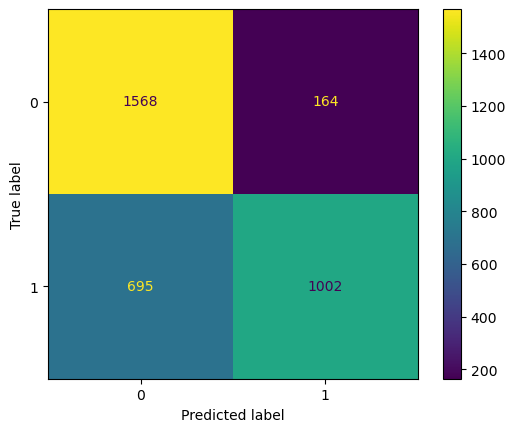

In [29]:
conf_mat = confusion_matrix(y_test,y_pred)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred,normalize=False))

Accuracy: 2781


In [26]:
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
df_output=pd.DataFrame(y_test) 

In [28]:
df_output['pred']=y_pred

In [29]:
df_output

,phishing,pred
url,,
https://www.rga.com/about/workplace,0,0
http://starasia.com.hk,0,0
https://www.youtube.com/watch?v=XszqITK-UEw,0,0
http://www.civico1845.com/,0,0
http://rapidpaws.com/wp-content/we_transfer/index2.php?email=/,1,1
...,...,...
http://myckck.in/redirect.php?id=j4gww2,1,0
http://www.bcc.ca/buddhism/fournobletruthsandeightfoldpath.html,0,1
https://urb7.com/casasbahia/desktop/pag2.php?path=tv-video/Televisores/TV4K/smart-tv-led-55-uhd-4k-lg-55um7520psb-com-thinq-ai-inteligencia-artificial-ips-quad-core-hdr-ativo-dts-virtual-x-webos-4-5-bluetooth-e-hdmi-50004199.html,1,1


In [29]:
y_test.head(20)

7529     legitimate
11221    legitimate
4889     legitimate
8962     legitimate
4004       phishing
3265     legitimate
11235      phishing
8897     legitimate
900      legitimate
7856     legitimate
3936     legitimate
11049      phishing
5551     legitimate
1393     legitimate
8847     legitimate
11018      phishing
1662       phishing
10297      phishing
6196       phishing
3834       phishing
Name: status, dtype: object

In [28]:
y_pred[:20]

array(['legitimate', 'legitimate', 'legitimate', 'legitimate', 'phishing',
       'legitimate', 'phishing', 'legitimate', 'legitimate', 'legitimate',
       'legitimate', 'phishing', 'phishing', 'legitimate', 'legitimate',
       'legitimate', 'legitimate', 'legitimate', 'phishing', 'legitimate'],
      dtype=object)

In [50]:
list(cleaned_df.columns)

['url',
 'status',
 'url_lenght',
 'url_dot_count',
 'url_underline_count',
 'url_hyphen_count',
 'url_slash_count',
 'url_questionmark_count',
 'url_equal_count',
 'url_at_count',
 'url_and_count',
 'url_exclamation_count',
 'url_space_count',
 'url_comma_count',
 'url_tilde_count',
 'url_plus_count',
 'url_asterisk_count',
 'url_hashtag_count',
 'url_dollar_count',
 'url_percent_count',
 'hostname_lenght',
 'hostname_dot_count',
 'hostname_underline_count',
 'hostname_hyphen_count',
 'hostname_slash_count',
 'hostname_questionmark_count',
 'hostname_equal_count',
 'hostname_at_count',
 'hostname_and_count',
 'hostname_exclamation_count',
 'hostname_space_count',
 'hostname_comma_count',
 'hostname_tilde_count',
 'hostname_plus_count',
 'hostname_asterisk_count',
 'hostname_hashtag_count',
 'hostname_dollar_count',
 'hostname_percent_count',
 'hostname_isip',
 'hostname_cl_se_count',
 'file_lenght',
 'file_dot_count',
 'file_underline_count',
 'file_hyphen_count',
 'file_slash_count',

In [53]:
cleaned_df.shape

(11430, 58)